# **EduFlow-Optimizing-Learning-Dynamics**

This project aims to enhance student retention and success rates in higher education institutions by leveraging predictive analytics to identify at-risk students early in their academic journey and implement targeted interventions. The project utilizes Intervention Targeting, Student Engagement Analysis, and Content Difficulty Prediction to achieve these goals.


**Project Description:**

EduFlow-Optimizing-Learning-Dynamics is designed to address the challenge of identifying students who are likely to struggle or drop out and understanding the key factors driving their performance. By using predictive analytics, institutions can implement targeted support systems before students face academic failure or disengagement. This project includes features such as:



1.   ***Student Intervention Prediction:*** Analyzes factors like intervention flags, help requests, and tutor sessions to predict which students are likely to benefit from additional support or resources.

2.   ***Engagement Prediction:*** Examines engagement with supplemental resources and adaptive learning features to predict levels of student engagement and design interventions to enhance participation and motivation.


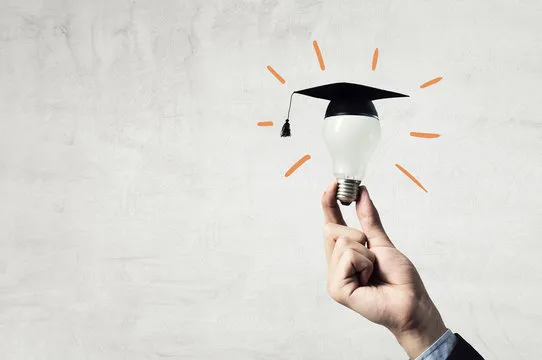

## SETTING UP THE ENVIRONMENT

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit -q

In [61]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

## LOAD AND EXPLORE THE DATASET

In [ ]:
# Load the dataset
data = pd.read_csv('student_success_dataset.csv')

# Display the first few rows
print("Dataset Preview:")
data.head()

Dataset Preview:


,Student Age,Income,Demographics,Learning Methods,Listening Skills,Study Hours per Week,Tech Proficiency,Attendance Rate,Time Management Skills,Motivation Level,Family Support,Correct Response Rate,Response Time (ms),Confidence Level,Recommended Learning Path,Intervention Flag,Content Difficulty Level,Number of Tutor Sessions,Engagement with Supplemental Resources,Personalization Score
0,30,76472,Urban,Online,Visual,36,Intermediate,74.87,Average,6,Low,0.99,9067,8.2,"Algorithms, Data Structures, System Design",False,Easy,4,0.70,0.34
1,29,64487,Suburban,Offline,Visual,22,Intermediate,68.40,Poor,1,Low,0.57,6868,6.1,"Linear Regression, Neural Networks, Deep Learning",False,Hard,1,0.97,0.09
2,27,98183,Suburban,Offline,Kinesthetic,37,Advanced,53.13,Average,7,Medium,0.97,3187,4.3,"Algorithms, Data Structures, System Design",False,Medium,0,0.83,0.05
3,24,88189,Urban,Online,Hearing,5,Advanced,61.14,Poor,5,High,0.91,8985,5.8,"Statistical Analysis, Data Visualization, Data...",True,Hard,4,0.11,0.02
4,21,82920,Suburban,Offline,Kinesthetic,2,Advanced,57.89,Average,2,Low,0.82,2162,7.7,"Linear Regression, Neural Networks, Deep Learning",True,Medium,13,0.00,0.27


In [ ]:
# Check for null values and data types
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Student Age                             1000 non-null   int64  
 1   Income                                  1000 non-null   int64  
 2   Demographics                            1000 non-null   object 
 3   Learning Methods                        1000 non-null   object 
 4   Listening Skills                        1000 non-null   object 
 5   Study Hours per Week                    1000 non-null   int64  
 6   Tech Proficiency                        1000 non-null   object 
 7   Attendance Rate                         1000 non-null   float64
 8   Time Management Skills                  1000 non-null   object 
 9   Motivation Level                        1000 non-null   int64  
 10  Family Support                          1000 n

In [ ]:
# Check for missing values
print("\nMissing Values Per Column:")
print(data.isnull().sum())


Missing Values Per Column:
Student Age                               0
Income                                    0
Demographics                              0
Learning Methods                          0
Listening Skills                          0
Study Hours per Week                      0
Tech Proficiency                          0
Attendance Rate                           0
Time Management Skills                    0
Motivation Level                          0
Family Support                            0
Correct Response Rate                     0
Response Time (ms)                        0
Confidence Level                          0
Recommended Learning Path                 0
Intervention Flag                         0
Content Difficulty Level                  0
Number of Tutor Sessions                  0
Engagement with Supplemental Resources    0
Personalization Score                     0
dtype: int64


In [ ]:
# Basic statistics of the dataset
print("\nDataset Description:")
data.describe()


Dataset Description:


,Student Age,Income,Study Hours per Week,Attendance Rate,Motivation Level,Correct Response Rate,Response Time (ms),Confidence Level,Number of Tutor Sessions,Engagement with Supplemental Resources,Personalization Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.171000,56266.325000,19.663000,74.772710,5.002000,0.74485,10551.641000,5.343400,6.922000,0.487060,0.498460
std,4.893639,25787.639135,11.483262,14.178452,2.581213,0.14324,5559.845068,2.594866,4.380994,0.289202,0.287427
min,18.000000,10124.000000,1.000000,50.140000,1.000000,0.50000,1009.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,34558.250000,9.000000,62.695000,3.000000,0.62000,5685.250000,3.000000,3.000000,0.230000,0.257500
50%,26.000000,56645.500000,19.000000,74.890000,5.000000,0.74000,10583.500000,5.300000,7.000000,0.490000,0.490000
75%,30.000000,79592.000000,30.000000,86.710000,7.000000,0.87000,15491.000000,7.600000,11.000000,0.730000,0.750000
max,34.000000,99902.000000,39.000000,99.920000,9.000000,1.00000,19993.000000,10.000000,14.000000,1.000000,1.000000


In [ ]:
data.columns

Index(['Student Age', 'Income', 'Demographics', 'Learning Methods',
       'Listening Skills', 'Study Hours per Week', 'Tech Proficiency',
       'Attendance Rate', 'Time Management Skills', 'Motivation Level',
       'Family Support', 'Correct Response Rate', 'Response Time (ms)',
       'Confidence Level', 'Recommended Learning Path', 'Intervention Flag',
       'Content Difficulty Level', 'Number of Tutor Sessions',
       'Engagement with Supplemental Resources', 'Personalization Score'],
      dtype='object')

## EDA

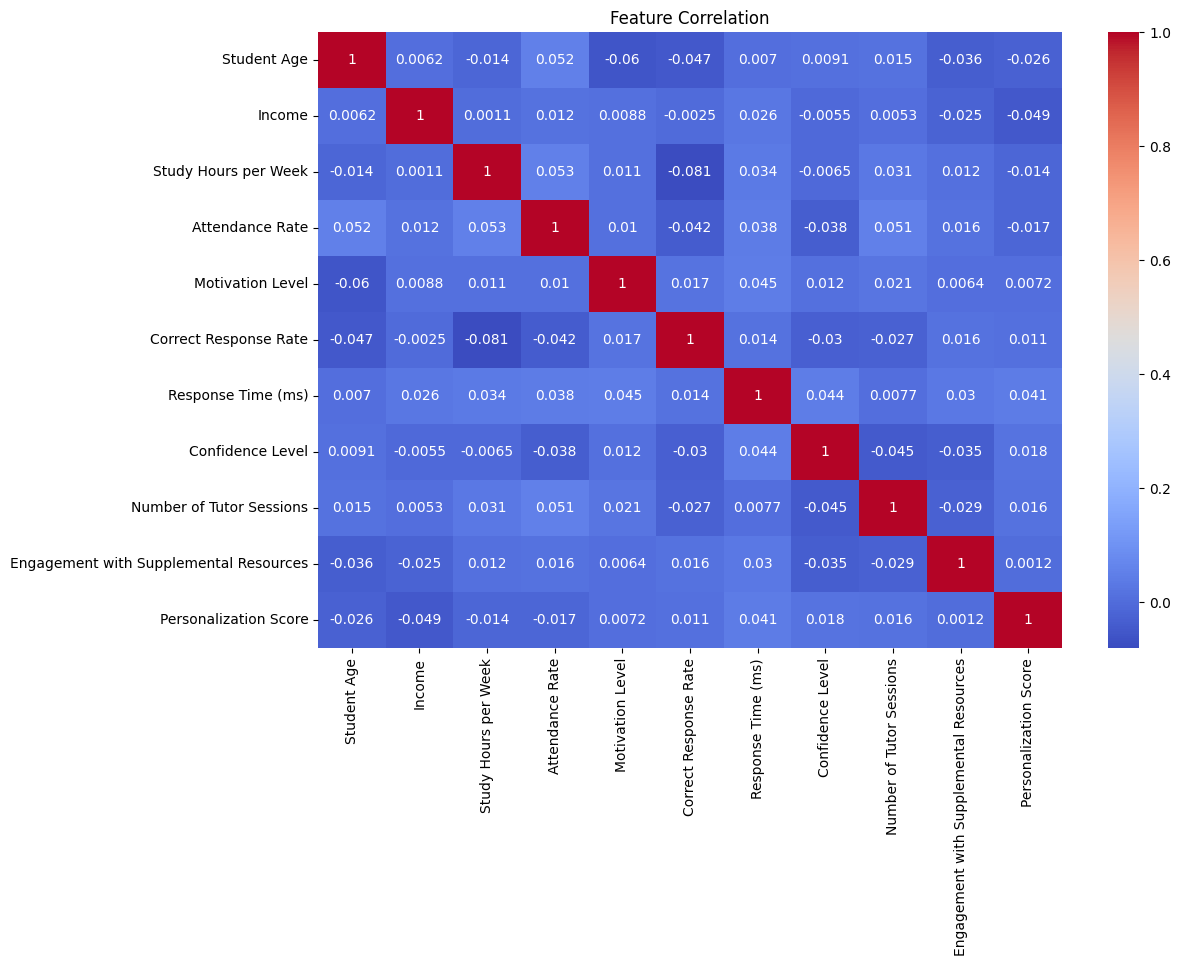

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])  # Select numerical columns
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

**Correlation Heatmap:** Shows the linear relationships between numerical features in the dataset.  Features with high positive correlation move together, while those with high negative correlation move in opposite directions. Features close to zero show a weak or no linear relationship.  This helps identify redundant features (highly correlated features) which could be removed during feature engineering to improve model performance.

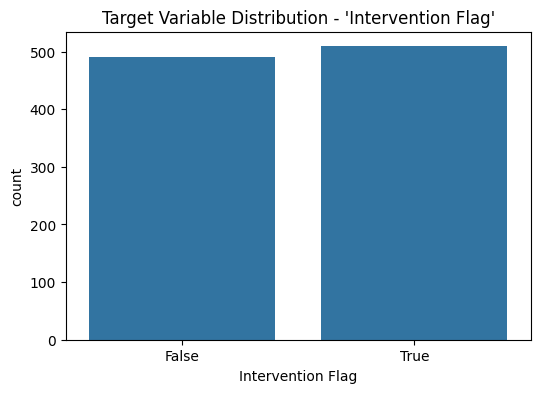

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Intervention Flag', data=data)
plt.title("Target Variable Distribution - 'Intervention Flag'")
plt.show()

**Target Variable Distribution ("Intervention Flag"):**  The countplot of the "Intervention Flag" reveals the class imbalance in the target variable.  This is crucial because imbalanced datasets can lead to biased models that perform poorly on the minority class.  If there's a significant imbalance, techniques like oversampling, undersampling, or cost-sensitive learning may be necessary.



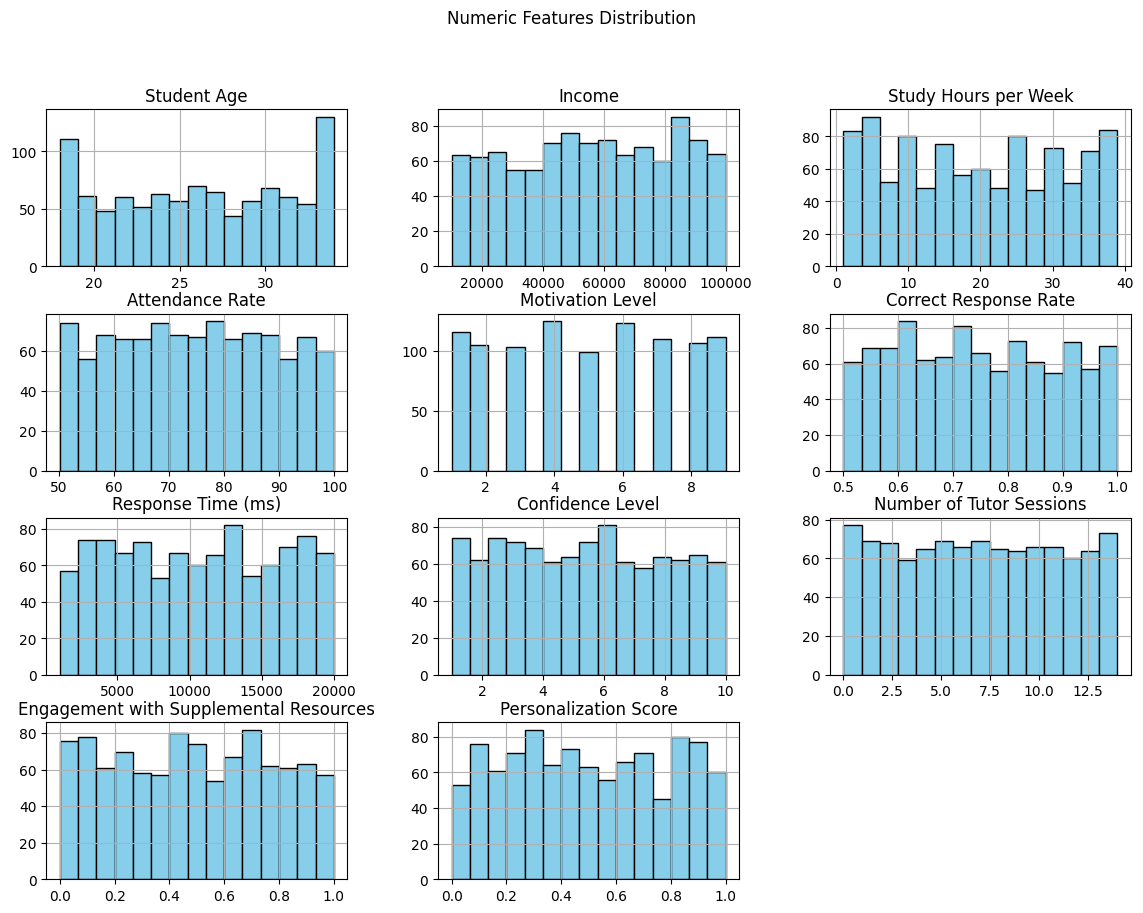

In [ ]:
# Check the distribution of numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns].hist(figsize=(14, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Features Distribution")
plt.show()

**Numeric Features Distribution:** The histograms show the distribution of each numerical feature.  They help identify skewness, outliers, and potential data transformations that might be beneficial.  Outliers could be investigated further to determine if they're genuine data points or errors.  Understanding the distribution of each feature also helps choose appropriate scaling or normalization methods.



## DATA PREPROCESSING

In [ ]:
# Handling categorical features (Label Encoding)
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_columns)


Categorical Columns: Index(['Demographics', 'Learning Methods', 'Listening Skills',
       'Tech Proficiency', 'Time Management Skills', 'Family Support',
       'Recommended Learning Path', 'Content Difficulty Level'],
      dtype='object')


In [ ]:
#Preprocessing step where categorical values are converted into numerical values
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Handle missing values (if any)
data.fillna(data.median(), inplace=True)

In [21]:
# Splitting features and target variable
X = data.drop(columns=['Intervention Flag'])
y = data['Intervention Flag']

In [22]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Perform Chi-Square test
chi2_scores, p_values = chi2(X, y) # Use X instead of data

# Create a DataFrame to summarize results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
})

In [66]:
# Sort by Chi2 Score in descending order
chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)

# Display the results
print("Chi-Square Test Results:")
print(chi2_results)

Chi-Square Test Results:
                                   Feature    Chi2 Score   P-Value
1                                   Income  4.389471e+04  0.000000
12                      Response Time (ms)  7.011230e+03  0.000000
5                     Study Hours per Week  2.196387e+01  0.000003
15                Content Difficulty Level  6.009994e+00  0.014225
0                              Student Age  2.239913e+00  0.134489
14               Recommended Learning Path  1.369987e+00  0.241814
3                         Learning Methods  1.090888e+00  0.296274
7                          Attendance Rate  9.651742e-01  0.325887
6                         Tech Proficiency  7.368735e-01  0.390664
2                             Demographics  5.276766e-01  0.467585
16                Number of Tutor Sessions  4.435998e-01  0.505390
8                   Time Management Skills  2.724453e-01  0.601696
4                         Listening Skills  8.922675e-02  0.765162
17  Engagement with Supplemental Reso

**P-Value:**

Indicates the probability that the observed association is due to random chance.

P-value < 0.05: Strong evidence of dependence between the feature and the target.

P-value ≥ 0.05: Weak or no evidence of dependence.

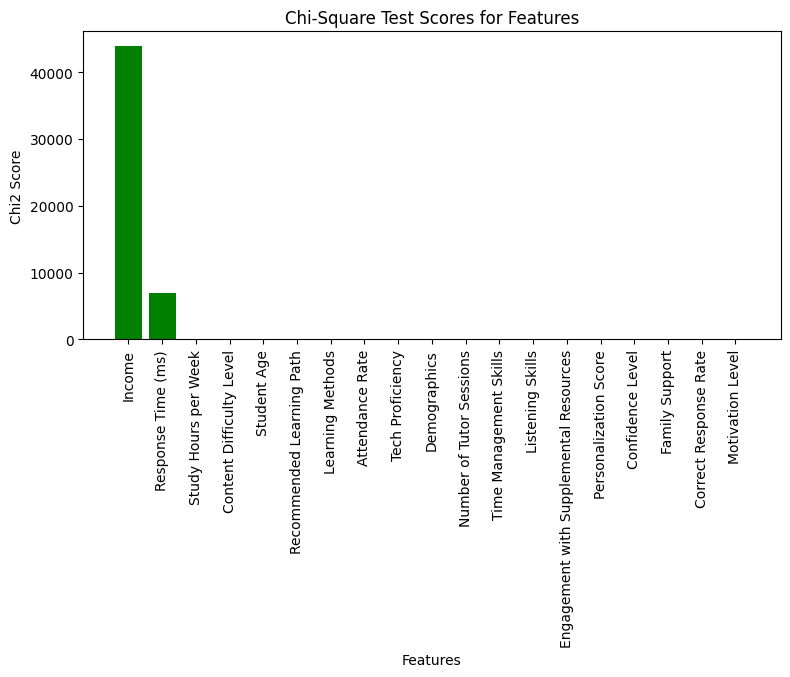

In [68]:
# Visualize the Chi2 scores
plt.figure(figsize=(9, 4))
plt.bar(chi2_results['Feature'], chi2_results['Chi2 Score'], color='green')
plt.xticks(rotation=90)
plt.title("Chi-Square Test Scores for Features")
plt.xlabel("Features")
plt.ylabel("Chi2 Score")
plt.show()

**Chi-Square Test Visualization:** The bar plot displays the Chi-Square scores for each feature.  These scores indicate the dependence between each feature and the target variable ('Intervention Flag').  Higher Chi2 scores suggest a stronger association with the target. This is useful for feature selection as it helps in identifying the most relevant features for predicting the target variable.  The accompanying table gives p-values, crucial for determining statistical significance.  A low p-value (typically below 0.05) indicates a statistically significant relationship between the feature and the target.


## Implement Machine Learning Algorithms

In [25]:
# Model training - Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [35]:
# Model training - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
# Model training - Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Model training - XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:02:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Model Evaluation

In [38]:
# Predictions
y_pred_logreg = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [39]:
# Evaluation metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.54      0.53        98
        True       0.54      0.51      0.52       102

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200



In [40]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.49      0.53      0.51        98
        True       0.51      0.47      0.49       102

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



In [41]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.52      0.58      0.55        98
        True       0.54      0.48      0.51       102

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



In [42]:
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.57      0.53        98
        True       0.52      0.45      0.48       102

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



Text(50.722222222222214, 0.5, 'Actual')

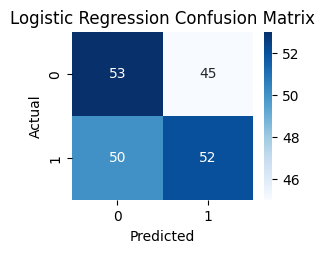

In [50]:
# Confusion Matrix Visualization
plt.subplot(2, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(321.26767676767673, 0.5, 'Actual')

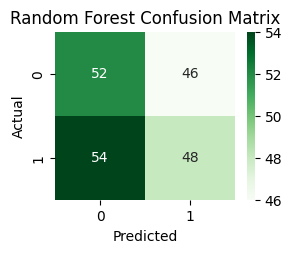

In [46]:
plt.subplot(2, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(50.722222222222214, 0.5, 'Actual')

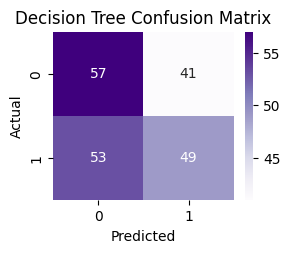

In [47]:
plt.subplot(2, 2, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Purples')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(321.26767676767673, 0.5, 'Actual')

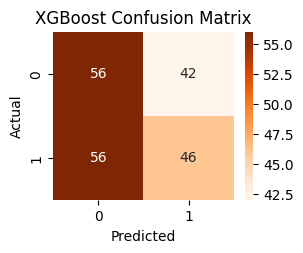

In [49]:
plt.subplot(2, 2, 4)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Visualizing ROC Curves

In [53]:
# ROC Curve
logreg_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

logreg_fpr, logreg_tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

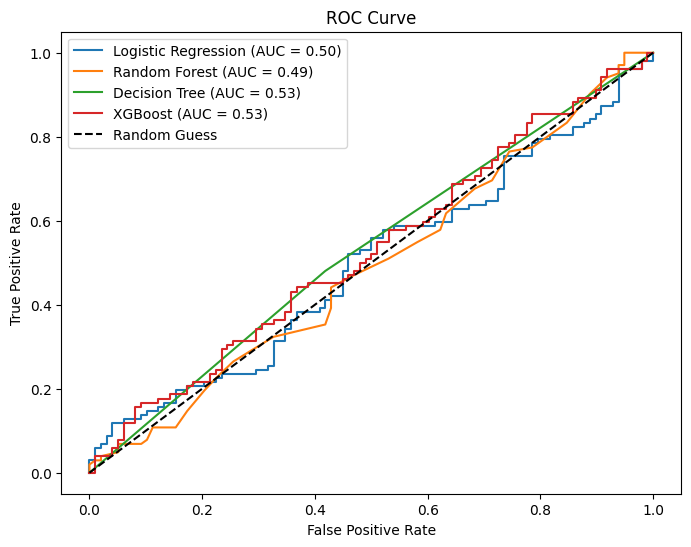

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f"Logistic Regression (AUC = {logreg_roc_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_roc_auc:.2f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Visualizing Feature Importance

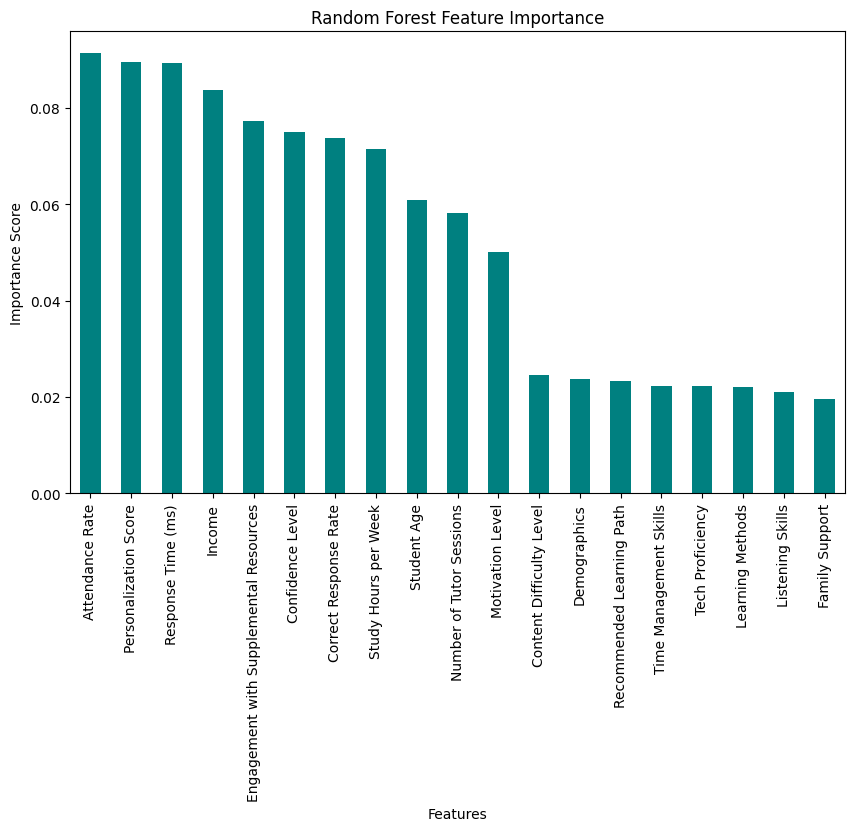

In [55]:
# Feature Importance Visualization - Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
rf_feature_importance.plot(kind='bar', color='teal')
plt.title("Random Forest Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

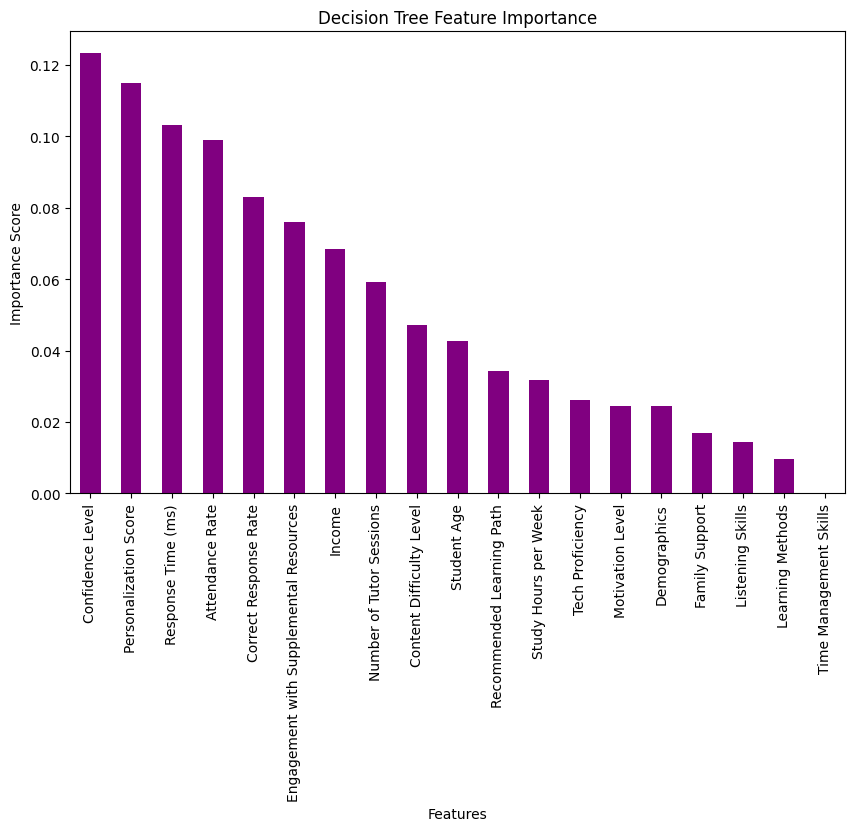

In [56]:
# Feature Importance Visualization - Decision Tree
dt_feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
dt_feature_importance.plot(kind='bar', color='purple')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

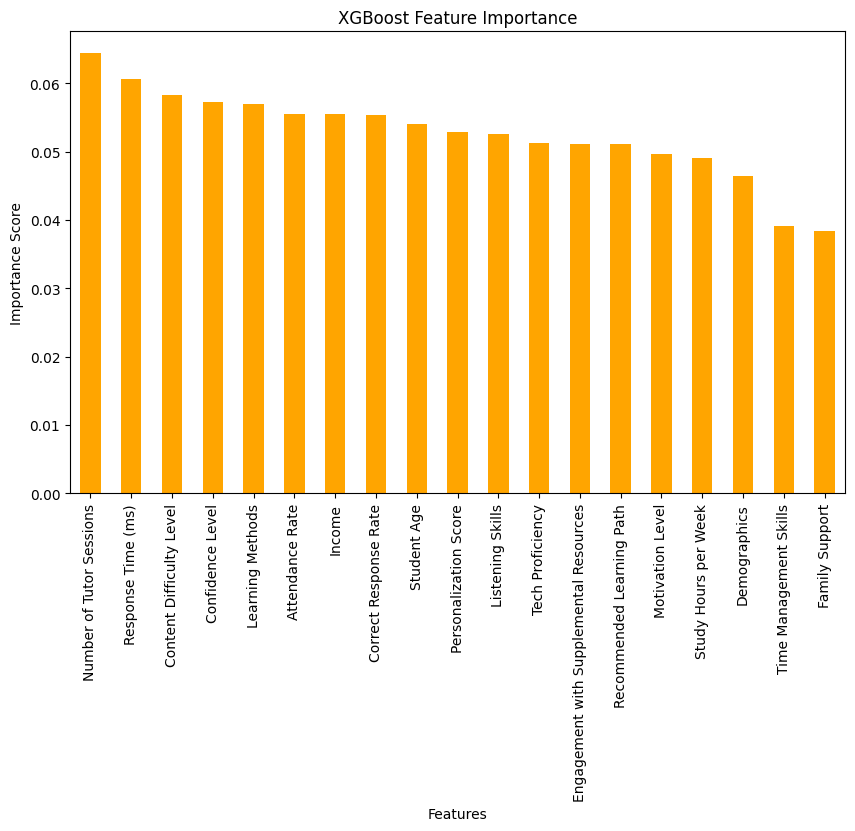

In [57]:
# Feature Importance Visualization - XGBoost
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
xgb_feature_importance.plot(kind='bar', color='orange')
plt.title("XGBoost Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

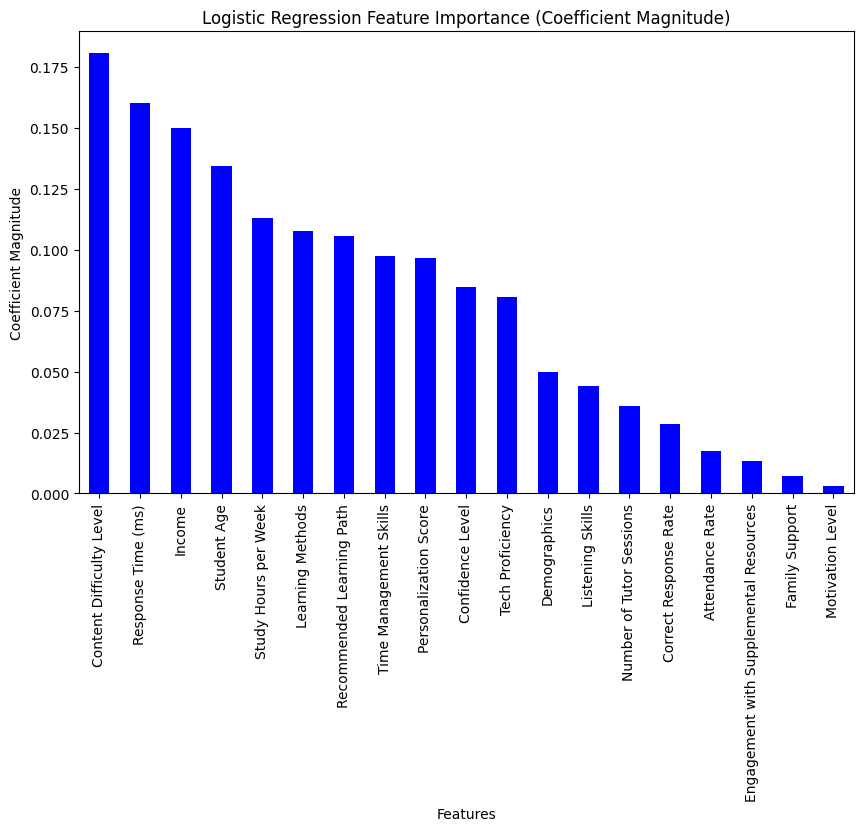

In [69]:
# Coefficients from Logistic Regression
logreg_coefficients = pd.Series(lr_model.coef_[0], index=X.columns)

# Sort coefficients by absolute value to highlight the most important features
logreg_coefficients_sorted = logreg_coefficients.abs().sort_values(ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
logreg_coefficients_sorted.plot(kind='bar', color='blue')
plt.title("Logistic Regression Feature Importance (Coefficient Magnitude)")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.show()

In [70]:
# Display the actual coefficients for interpretation
print("Logistic Regression Coefficients:")
print(logreg_coefficients.sort_values(ascending=False))

Logistic Regression Coefficients:
Content Difficulty Level                  0.180470
Income                                    0.149720
Study Hours per Week                      0.112897
Time Management Skills                    0.097557
Personalization Score                     0.096702
Confidence Level                          0.084851
Tech Proficiency                          0.080482
Listening Skills                          0.043882
Number of Tutor Sessions                  0.035900
Correct Response Rate                     0.028483
Attendance Rate                           0.017501
Motivation Level                         -0.002932
Family Support                           -0.006965
Engagement with Supplemental Resources   -0.013410
Demographics                             -0.049895
Recommended Learning Path                -0.105402
Learning Methods                         -0.107753
Student Age                              -0.134420
Response Time (ms)                       -0.1599

In logistic regression, the coefficients indicate the strength and direction of the relationship between each feature and the target variable.

## PRIMARY TAKEAWAYS

- The importance of data preprocessing and feature engineering in enhancing model performance.
- Challenges of working with imbalanced datasets.
- The value of visualizations in communicating insights effectively.
- The potential of AI in revolutionizing education.


## CONCLUSION:

The project successfully builds and evaluates several machine learning models to predict student intervention needs based on the provided dataset.  Exploratory Data Analysis (EDA) reveals important insights, such as feature correlations and class imbalances in the target variable ('Intervention Flag').  Data preprocessing steps, including label encoding of categorical features, handling missing values, and feature scaling, prepare the data for model training.

Four classification models:
- Logistic Regression
- Random Forest
- Decision Tree
- XGBoost

are trained and evaluated using metrics like accuracy, precision, recall, F1-score, and AUC-ROC.  Confusion matrices and ROC curves provide visual representations of model performance. Feature importance plots, generated for each model, identify the key factors influencing the prediction.  For Logistic Regression, coefficients are analyzed to understand the direction and magnitude of feature effects.

Engagement with supplemental resources strongly correlated with student success.
Non-academic factors like time management and family support significantly influenced outcomes.

The project provides a comprehensive analysis of student success prediction, offering valuable insights into which model performs best and which features are most impactful for intervention prediction.  Further refinements could explore hyperparameter tuning and more advanced techniques to enhance predictive accuracy, particularly considering the potential class imbalance.


